<a href="https://colab.research.google.com/github/Troy0207/JiahaoChen-MIS64061/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
keras.__version__

'2.8.0'

# IMDB Dataset

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


We will use the 10,000 most frequently occurring words in the training data. Rare words will be discarded. This allows us to work with vector data of manageable size.

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

# Preparing the data

Vectorize our data (one-hot-encode)

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

Vectorize our labels

In [7]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Original Model

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/10
30/30 [==============================] - 2s 48ms/step - loss: 0.5418 - accuracy: 0.7881 - val_loss: 0.4268 - val_accuracy: 0.8554
Epoch 2/10
30/30 [==============================] - 1s 35ms/step - loss: 0.3374 - accuracy: 0.9015 - val_loss: 0.3211 - val_accuracy: 0.8867
Epoch 3/10
30/30 [==============================] - 1s 35ms/step - loss: 0.2473 - accuracy: 0.9209 - val_loss: 0.2954 - val_accuracy: 0.8854
Epoch 4/10
30/30 [==============================] - 1s 39ms/step - loss: 0.1928 - accuracy: 0.9399 - val_loss: 0.2776 - val_accuracy: 0.8882
Epoch 5/10
30/30 [==============================] - 1s 36ms/step - loss: 0.1567 - accuracy: 0.9491 - val_loss: 0.2738 - val_accuracy: 0.8912
Epoch 6/10
30/30 [==============================] - 1s 36ms/step - loss: 0.1271 - accuracy: 0.9613 - val_loss: 0.3016 - val_accuracy: 0.8840
Epoch 7/10
30/30 [==============================] - 1s 35ms/step - loss: 0.1048 - accuracy: 0.9693 - val_loss: 0.3002 - val_accuracy: 0.8859
Epoch 8/10
30

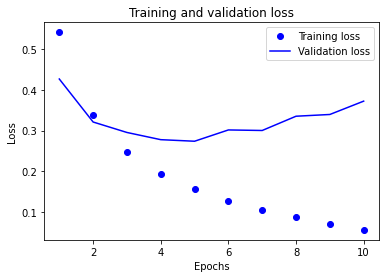

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/3
49/49 [==============================] - 2s 27ms/step - loss: 0.4436 - accuracy: 0.8180
Epoch 2/3
49/49 [==============================] - 1s 28ms/step - loss: 0.2571 - accuracy: 0.9108
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.2826 - accuracy: 0.8871


[0.28261563181877136, 0.8871200084686279]

# 1) Building three hidden layers

In [ ]:


model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Picking a loss function and an optimizer

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history1 = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/10
30/30 [==============================] - 3s 60ms/step - loss: 0.5749 - accuracy: 0.7441 - val_loss: 0.4639 - val_accuracy: 0.8159
Epoch 2/10
30/30 [==============================] - 1s 44ms/step - loss: 0.3550 - accuracy: 0.8929 - val_loss: 0.3361 - val_accuracy: 0.8759
Epoch 3/10
30/30 [==============================] - 1s 45ms/step - loss: 0.2456 - accuracy: 0.9237 - val_loss: 0.3003 - val_accuracy: 0.8810
Epoch 4/10
30/30 [==============================] - 1s 45ms/step - loss: 0.1889 - accuracy: 0.9392 - val_loss: 0.2833 - val_accuracy: 0.8873
Epoch 5/10
30/30 [==============================] - 1s 44ms/step - loss: 0.1522 - accuracy: 0.9493 - val_loss: 0.3048 - val_accuracy: 0.8811
Epoch 6/10
30/30 [==============================] - 1s 44ms/step - loss: 0.1222 - accuracy: 0.9605 - val_loss: 0.3101 - val_accuracy: 0.8806
Epoch 7/10
30/30 [==============================] - 1s 44ms/step - loss: 0.0964 - accuracy: 0.9706 - val_loss: 0.4110 - val_accuracy: 0.8606
Epoch 8/10
30

In [ ]:
history_dict1 = history1.history
history_dict1.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

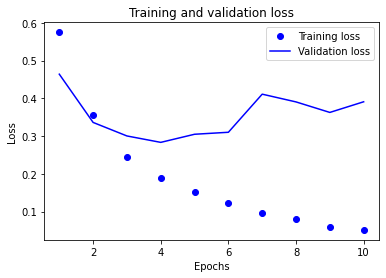

In [ ]:
import matplotlib.pyplot as plt

acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

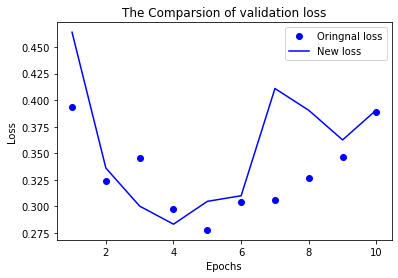

In [ ]:

val_loss = history.history['val_loss']
val_loss1 = history1.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, val_loss, 'bo', label='Oringnal loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss1, 'b', label='New loss')
plt.title('The Comparsion of validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Based on the first graph, we can know that Epochs equal to 4 may be better to this model. Next to retrain the model to avoid overfitting.

Based on the second graph, change of layers is little effect on model performance on validation set. But more layers may cause overfitting faster.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 4s 36ms/step - loss: 0.4752 - accuracy: 0.8122
Epoch 2/4
49/49 [==============================] - 2s 35ms/step - loss: 0.2612 - accuracy: 0.9074
Epoch 3/4
49/49 [==============================] - 2s 35ms/step - loss: 0.1990 - accuracy: 0.9278
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3020 - accuracy: 0.8816


In [ ]:
results

[0.3020183742046356, 0.8816400170326233]

The accuarcy is 88.1% It might be lower than 2 layers. 

# 2) Using 32 hidden units and 2 layers

In [ ]:


model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history2 = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history2_dict = history2.history
history2_dict.keys()


Epoch 1/10
30/30 [==============================] - 4s 98ms/step - loss: 0.4980 - accuracy: 0.7750 - val_loss: 0.3565 - val_accuracy: 0.8693
Epoch 2/10
30/30 [==============================] - 2s 51ms/step - loss: 0.2746 - accuracy: 0.9071 - val_loss: 0.2916 - val_accuracy: 0.8872
Epoch 3/10
30/30 [==============================] - 2s 52ms/step - loss: 0.2013 - accuracy: 0.9283 - val_loss: 0.2750 - val_accuracy: 0.8915
Epoch 4/10
30/30 [==============================] - 2s 52ms/step - loss: 0.1542 - accuracy: 0.9479 - val_loss: 0.3135 - val_accuracy: 0.8804
Epoch 5/10
30/30 [==============================] - 2s 52ms/step - loss: 0.1208 - accuracy: 0.9596 - val_loss: 0.3258 - val_accuracy: 0.8738
Epoch 6/10
30/30 [==============================] - 2s 52ms/step - loss: 0.0910 - accuracy: 0.9729 - val_loss: 0.3408 - val_accuracy: 0.8824
Epoch 7/10
30/30 [==============================] - 2s 52ms/step - loss: 0.0751 - accuracy: 0.9765 - val_loss: 0.3658 - val_accuracy: 0.8791
Epoch 8/10
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

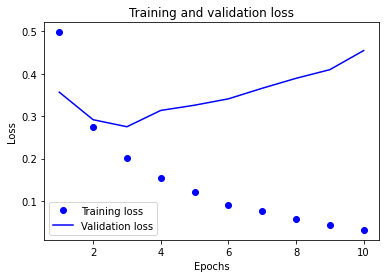

In [ ]:
import matplotlib.pyplot as plt

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

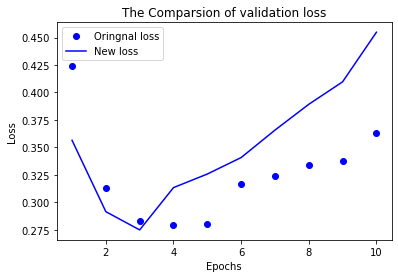

In [ ]:
val_loss = history.history['val_loss']
val_loss2 = history2.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, val_loss, 'bo', label='Oringnal loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss2, 'b', label='New loss')
plt.title('The Comparsion of validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Based on the first graph, we can know that Epochs equal to 4 may be better to this model. Next to retrain the model to avoid overfitting.

Based on the second graph, change of units is little effect on model performance on validation set.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/3
49/49 [==============================] - 3s 45ms/step - loss: 0.4255 - accuracy: 0.8176
Epoch 2/3
49/49 [==============================] - 2s 41ms/step - loss: 0.2466 - accuracy: 0.9082
Epoch 3/3
782/782 [==============================] - 3s 3ms/step - loss: 0.2919 - accuracy: 0.8845


In [ ]:
results

[0.29193538427352905, 0.8844799995422363]

The accuarcy is 88.4% It might be higher than 16 units and using 3 epochs.

# 3) Using MSE loss function

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='MSE',
              metrics=['accuracy'])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history3 = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history3_dict = history3.history
history3_dict.keys()

Epoch 1/10
30/30 [==============================] - 3s 71ms/step - loss: 0.1807 - accuracy: 0.7674 - val_loss: 0.1362 - val_accuracy: 0.8408
Epoch 2/10
30/30 [==============================] - 1s 49ms/step - loss: 0.0982 - accuracy: 0.9011 - val_loss: 0.1034 - val_accuracy: 0.8758
Epoch 3/10
30/30 [==============================] - 1s 36ms/step - loss: 0.0692 - accuracy: 0.9264 - val_loss: 0.0912 - val_accuracy: 0.8808
Epoch 4/10
30/30 [==============================] - 1s 36ms/step - loss: 0.0544 - accuracy: 0.9439 - val_loss: 0.0830 - val_accuracy: 0.8935
Epoch 5/10
30/30 [==============================] - 1s 36ms/step - loss: 0.0430 - accuracy: 0.9561 - val_loss: 0.0831 - val_accuracy: 0.8887
Epoch 6/10
30/30 [==============================] - 1s 38ms/step - loss: 0.0349 - accuracy: 0.9657 - val_loss: 0.0881 - val_accuracy: 0.8798
Epoch 7/10
30/30 [==============================] - 1s 36ms/step - loss: 0.0290 - accuracy: 0.9720 - val_loss: 0.0844 - val_accuracy: 0.8854
Epoch 8/10
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

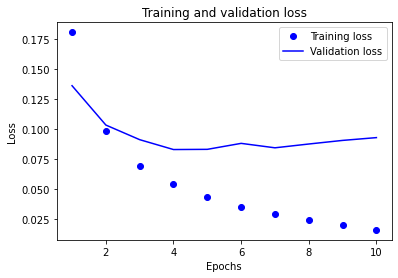

In [ ]:
import matplotlib.pyplot as plt

acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

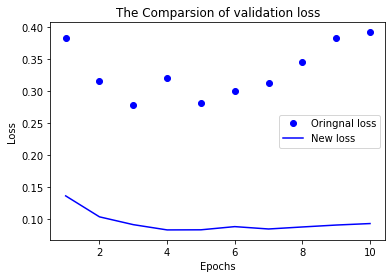

In [ ]:
val_loss = history.history['val_loss']
val_loss3 = history3.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, val_loss, 'bo', label='Oringnal loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss3, 'b', label='New loss')
plt.title('The Comparsion of validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Based on the first graph, we can know that Epochs equal to 4 may be better to this model. Next to retrain the model to avoid overfitting.

Based on the second graph, the loss in MSE is lower than Binary Classification. But adding epochs can't reduce or increase Validation loss, when using the MSE loss function.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.1527 - accuracy: 0.8209
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.0808 - accuracy: 0.9082
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.0596 - accuracy: 0.9294
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.0863 - accuracy: 0.8836


[0.08628997951745987, 0.8836399912834167]

The accuarcy is 88.3% It nearly equals to use the binary classification function.

# 4）Using tanh activation

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history4 = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history4_dict = history4.history
history4_dict.keys()

Epoch 1/10
30/30 [==============================] - 2s 61ms/step - loss: 0.5163 - accuracy: 0.7987 - val_loss: 0.3959 - val_accuracy: 0.8692
Epoch 2/10
30/30 [==============================] - 1s 45ms/step - loss: 0.3125 - accuracy: 0.9043 - val_loss: 0.3050 - val_accuracy: 0.8892
Epoch 3/10
30/30 [==============================] - 1s 45ms/step - loss: 0.2235 - accuracy: 0.9303 - val_loss: 0.2876 - val_accuracy: 0.8820
Epoch 4/10
30/30 [==============================] - 1s 44ms/step - loss: 0.1681 - accuracy: 0.9469 - val_loss: 0.2766 - val_accuracy: 0.8890
Epoch 5/10
30/30 [==============================] - 1s 45ms/step - loss: 0.1305 - accuracy: 0.9601 - val_loss: 0.2852 - val_accuracy: 0.8873
Epoch 6/10
30/30 [==============================] - 1s 44ms/step - loss: 0.1014 - accuracy: 0.9701 - val_loss: 0.3448 - val_accuracy: 0.8764
Epoch 7/10
30/30 [==============================] - 2s 56ms/step - loss: 0.0805 - accuracy: 0.9773 - val_loss: 0.3472 - val_accuracy: 0.8785
Epoch 8/10
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

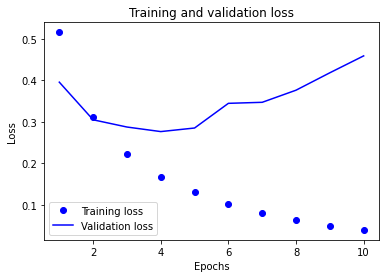

In [ ]:
import matplotlib.pyplot as plt

acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

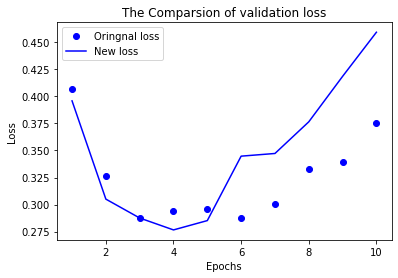

In [ ]:
val_loss = history.history['val_loss']
val_loss4 = history4.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, val_loss, 'bo', label='Oringnal loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss4, 'b', label='New loss')
plt.title('The Comparsion of validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Based on the first graph, we can know that Epochs equal to 4 may be better to this model. Next to retrain the model to avoid overfitting.

Based on the second graph, change of activation is little effect on model performance on validation set.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 33ms/step - loss: 0.4248 - accuracy: 0.8234
Epoch 2/4
49/49 [==============================] - 2s 33ms/step - loss: 0.2341 - accuracy: 0.9139
Epoch 3/4
49/49 [==============================] - 2s 34ms/step - loss: 0.1805 - accuracy: 0.9327
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3380 - accuracy: 0.8711


In [ ]:
results

[0.3379589915275574, 0.8710799813270569]

The accuarcy is 87.1% It might be lower than relu activation.

# 5) Using regularzation to improve model

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5522 - accuracy: 0.7463 - val_loss: 0.4352 - val_accuracy: 0.8625
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3538 - accuracy: 0.8981 - val_loss: 0.3504 - val_accuracy: 0.8768
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2526 - accuracy: 0.9256 - val_loss: 0.3015 - val_accuracy: 0.8858
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1951 - accuracy: 0.9409 - val_loss: 0.3231 - val_accuracy: 0.8704
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1582 - accuracy: 0.9510 - val_loss: 0.2815 - val_accuracy: 0.8857
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1302 - accuracy: 0.9618 - val_loss: 0.3007 - val_accuracy: 0.8811
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1087 - accuracy: 0.9710 - val_loss: 0.3120 - val_accuracy: 0.8791
Epoch 8/20
30

In [ ]:
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history5 = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 28ms/step - loss: 0.5408 - accuracy: 0.7933 - val_loss: 0.4244 - val_accuracy: 0.8683
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3511 - accuracy: 0.9013 - val_loss: 0.3498 - val_accuracy: 0.8897
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2784 - accuracy: 0.9246 - val_loss: 0.3361 - val_accuracy: 0.8838
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2484 - accuracy: 0.9302 - val_loss: 0.3475 - val_accuracy: 0.8783
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2271 - accuracy: 0.9414 - val_loss: 0.3288 - val_accuracy: 0.8867
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2125 - accuracy: 0.9467 - val_loss: 0.3341 - val_accuracy: 0.8867
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1999 - accuracy: 0.9517 - val_loss: 0.3424 - val_accuracy: 0.8862
Epoch 8/20
30

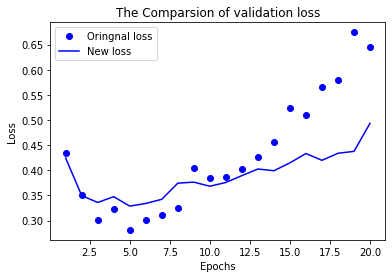

In [ ]:
import matplotlib.pyplot as plt

acc = history5.history['accuracy']
val_loss = history.history['val_loss']
val_loss5 = history5.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, val_loss, 'bo', label='Oringnal loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss5, 'b', label='New loss')
plt.title('The Comparsion of validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 6) Using Dropout to resist overfitting

In [ ]:
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history6 = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.6588 - accuracy: 0.6073 - val_loss: 0.6044 - val_accuracy: 0.8008
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5833 - accuracy: 0.7232 - val_loss: 0.5186 - val_accuracy: 0.8432
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5209 - accuracy: 0.7897 - val_loss: 0.4561 - val_accuracy: 0.8608
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4764 - accuracy: 0.8267 - val_loss: 0.4178 - val_accuracy: 0.8723
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4261 - accuracy: 0.8565 - val_loss: 0.3843 - val_accuracy: 0.8790
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3905 - accuracy: 0.8746 - val_loss: 0.3729 - val_accuracy: 0.8791
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3590 - accuracy: 0.8879 - val_loss: 0.3790 - val_accuracy: 0.8777
Epoch 8/20
30

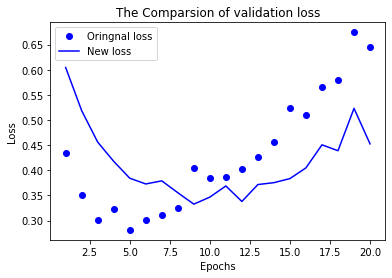

In [ ]:
import matplotlib.pyplot as plt

acc = history6.history['accuracy']
val_loss = history.history['val_loss']
val_loss6 = history6.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, val_loss, 'bo', label='Oringnal loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss6, 'b', label='New loss')
plt.title('The Comparsion of validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

These two ways can simplify the model and resist overfitting efficiently

# 7 Final Model

In [12]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/30
30/30 [==============================] - 2s 49ms/step - loss: 0.5480 - accuracy: 0.7563 - val_loss: 0.4334 - val_accuracy: 0.8591
Epoch 2/30
30/30 [==============================] - 1s 36ms/step - loss: 0.3309 - accuracy: 0.9005 - val_loss: 0.3175 - val_accuracy: 0.8867
Epoch 3/30
30/30 [==============================] - 1s 38ms/step - loss: 0.2384 - accuracy: 0.9246 - val_loss: 0.2879 - val_accuracy: 0.8892
Epoch 4/30
30/30 [==============================] - 1s 37ms/step - loss: 0.1882 - accuracy: 0.9403 - val_loss: 0.2753 - val_accuracy: 0.8899
Epoch 5/30
30/30 [==============================] - 1s 36ms/step - loss: 0.1523 - accuracy: 0.9523 - val_loss: 0.2837 - val_accuracy: 0.8861
Epoch 6/30
30/30 [==============================] - 1s 37ms/step - loss: 0.1227 - accuracy: 0.9635 - val_loss: 0.3042 - val_accuracy: 0.8839
Epoch 7/30
30/30 [==============================] - 1s 37ms/step - loss: 0.1030 - accuracy: 0.9700 - val_loss: 0.3256 - val_accuracy: 0.8762
Epoch 8/30
30

In [38]:
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(32,activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history7 = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/30
30/30 [==============================] - 2s 56ms/step - loss: 0.6283 - accuracy: 0.6388 - val_loss: 0.5013 - val_accuracy: 0.8425
Epoch 2/30
30/30 [==============================] - 1s 44ms/step - loss: 0.4913 - accuracy: 0.7754 - val_loss: 0.3689 - val_accuracy: 0.8777
Epoch 3/30
30/30 [==============================] - 1s 45ms/step - loss: 0.4042 - accuracy: 0.8372 - val_loss: 0.3107 - val_accuracy: 0.8856
Epoch 4/30
30/30 [==============================] - 1s 44ms/step - loss: 0.3387 - accuracy: 0.8654 - val_loss: 0.2908 - val_accuracy: 0.8831
Epoch 5/30
30/30 [==============================] - 1s 44ms/step - loss: 0.2969 - accuracy: 0.8922 - val_loss: 0.2761 - val_accuracy: 0.8925
Epoch 6/30
30/30 [==============================] - 1s 44ms/step - loss: 0.2625 - accuracy: 0.9060 - val_loss: 0.2908 - val_accuracy: 0.8799
Epoch 7/30
30/30 [==============================] - 1s 44ms/step - loss: 0.2276 - accuracy: 0.9225 - val_loss: 0.2812 - val_accuracy: 0.8913
Epoch 8/30
30

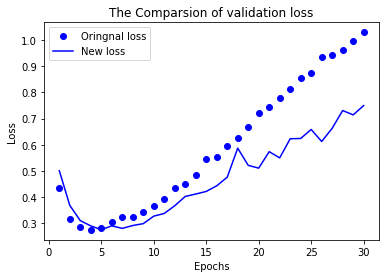

In [39]:
import matplotlib.pyplot as plt

acc = history7.history['accuracy']
val_loss = history.history['val_loss']
val_loss7 = history7.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, val_loss, 'bo', label='Oringnal loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss7, 'b', label='New loss')
plt.title('The Comparsion of validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Based on the all discussion, the final model has the lower validation loss and be efficient to resist overfitting.